In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [ ]:
# Step 2: Load Dataset
# 📌 Upload 'emails.csv' from Kaggle dataset to your Colab environment before running this cell.
# Dataset: https://www.kaggle.com/datasets/meruvulikith/190k-spam-ham-email-dataset-for-classification

df = pd.read_csv("/content/mail_data.csv")  # Change filename if necessary
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Dataset loaded successfully!
Shape: (5572, 2)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Step 3: Check Columns and Rename if necessary
if 'label' not in df.columns and 'Category' in df.columns:
    df.rename(columns={'Category': 'label'}, inplace=True)
if 'text' not in df.columns and 'Message' in df.columns:
    df.rename(columns={'Message': 'text'}, inplace=True)

print("🧩 Columns in dataset:", df.columns)

🧩 Columns in dataset: Index(['label', 'text'], dtype='object')


In [ ]:
# Step 4: Handle Missing Values
df.dropna(subset=['text', 'label'], inplace=True)
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

print("✅ Missing values handled!")
df.isnull().sum()

✅ Missing values handled!


,0
label,0
text,0


In [ ]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

print("✅ Data split complete!")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

✅ Data split complete!
Training samples: 4457, Testing samples: 1115


In [ ]:
# Step 6: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("✅ TF-IDF vectorization complete!")
print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)

✅ TF-IDF vectorization complete!
Train shape: (4457, 5000)
Test shape: (1115, 5000)


In [ ]:
# Step 7: Model Training
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
print("✅ Model trained successfully!")

✅ Model trained successfully!


In [ ]:
# Step 8: Prediction
y_pred = model.predict(X_test_tfidf)
print("✅ Predictions generated!")

✅ Predictions generated!


In [ ]:
# Step 9: Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📈 --- MODEL PERFORMANCE ---")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

📈 --- MODEL PERFORMANCE ---
Accuracy:  0.9740
Precision: 1.0000
Recall:    0.8054
F1 Score:  0.8922


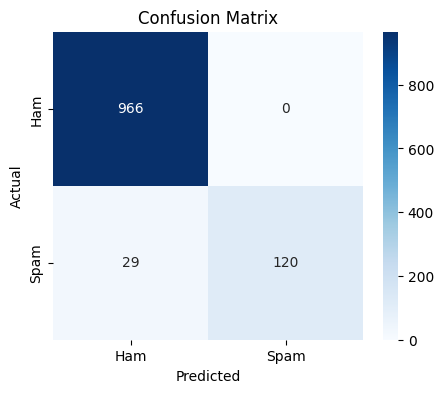

In [ ]:
# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Step 11: Classification Report
print("📜 Classification Report:\n")
print(classification_report(y_test, y_pred))

📜 Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [26]:
# Step 12: Sample Prediction
sample = [
    "Win a free iPhone now!",
    "Hey, are we meeting tomorrow?",
    "Limited-time offer! Claim your reward!",
    "Let's catch up this weekend."
]
sample_tfidf = tfidf.transform(sample)
pred = model.predict(sample_tfidf)

for txt, label in zip(sample, pred):
    print(f"'{txt}' --> {'Spam ' if label==1 else 'Ham '}")

'Win a free iPhone now!' --> Spam 
'Hey, are we meeting tomorrow?' --> Ham 
'Limited-time offer! Claim your reward!' --> Ham 
'Let's catch up this weekend.' --> Ham 
